In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
users = np.loadtxt('../../processed_data/last_fm/lfm_u_1.txt')
data = np.loadtxt('../../processed_data/last_fm/lfm_a_1.txt')
users = np.ones(users.size)
ones = 1 # change for each file dependig upon no. of ones.
timesteps = users.size
#timesteps = 5
no_recommendation = data.shape[1]
times_appeared = {}
weight = {}
scores = np.zeros(timesteps)
best_dcg = 0
for i in range(0,ones):
    best_dcg += 1.0/np.log(i+2)

In [3]:
def receive_user(t):
    return users[t]

def receive_items(t):
    return data[t]


In [4]:
def cascade_ucb1(u,items,t):
    if not u in times_appeared:
        times_appeared[u] = {}
        weight[u] = {}
    for i in range(0,items.size):
        if not items[i] in times_appeared[u]:
            times_appeared[u][items[i]] = 1.0
            weight[u][items[i]] = np.random.uniform(size=1)
               
    ucb = np.zeros(items.size)
    for i in range(0,items.size):
        ucb[i] = weight[u][items[i]] + np.sqrt((1.5*np.log(t+1))/times_appeared[u][items[i]])
    
    sorted_indices = np.argsort(ucb)
    sorted_indices = sorted_indices[::-1]
    sorted_items = np.zeros(items.size)
    for i in range(0,items.size):
            sorted_items[i] = items[sorted_indices[i]]
    return sorted_items

In [5]:
def score(t,clicked):
    for i in range(0,clicked.size):
        scores[t] += clicked[i]/np.log2(i+2)
    scores[t] /= best_dcg

In [6]:
def simulate_click(u,items,ranked_items):
    
    clicked = np.zeros(items.size)
    feedback = 999999
    for i in range(0,items.size):
        for j in range(0,ones):
            if items[j] == ranked_items[i]:
                clicked[i] = 1
                if i < feedback:
                    feedback = i
            break
    
    return feedback,clicked

In [7]:
def update(feedback,ranked_items):
    for i in range(0,feedback):
        weight[u][ranked_items[i]] = (times_appeared[u][ranked_items[i]]*weight[u][ranked_items[i]])/(times_appeared[u][ranked_items[i]]+1)
        times_appeared[u][ranked_items[i]] += 1
    if feedback!=items.size:
        weight[u][ranked_items[feedback]] = (times_appeared[u][ranked_items[feedback]]*weight[u][ranked_items[feedback]]+1)/(times_appeared[u][ranked_items[feedback]]+1)
        times_appeared[u][ranked_items[feedback]] += 1

In [8]:
start_time = time.time()
for t in range(0,timesteps):
    
    u = receive_user(t)
    items = receive_items(t)
    ranked_items = cascade_ucb1(u,items,t)
    feedback,clicked = simulate_click(u,items,ranked_items)
    score(t,clicked)
    update(feedback,ranked_items)
end_time = time.time()

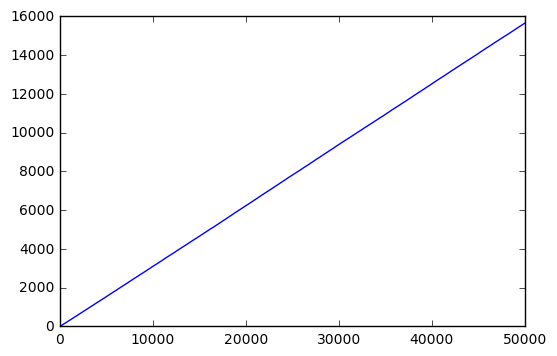

In [9]:
for t in range(1,timesteps):
    scores[t] += scores[t-1]

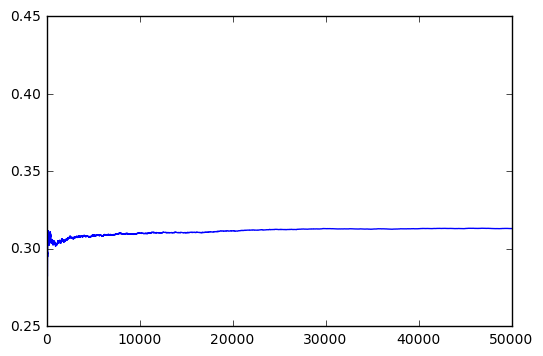

In [10]:
avg = np.zeros(timesteps)
for t in range(0,timesteps):
    avg[t] = scores[t]/(t+1)
plt.plot(avg)
plt.show()